<a href="https://colab.research.google.com/github/WaithiraHawi/LuxProject/blob/main/customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests pandas matplotlib seaborn

In [4]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()


#Loading dataset
CustomerData= 'Telco_Customer_Churn.csv'
CustomerDt = pd.read_csv(CustomerData)
print(CustomerDt.head())

Saving Telco_Customer_Churn.csv to Telco_Customer_Churn.csv
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  

In [5]:

# This is data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Handling missing values
CustomerDt = CustomerDt.dropna()

# Encode categorical variables
le = LabelEncoder()
for col in CustomerDt.select_dtypes(include=['object']).columns:
    CustomerDt[col] = le.fit_transform(CustomerDt[col])

# Feature scaling
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
CustomerDt[numerical_features] = scaler.fit_transform(CustomerDt[numerical_features])

# Split dataset into features and target variable
X = CustomerDt.drop('Churn', axis=1)
y = CustomerDt['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

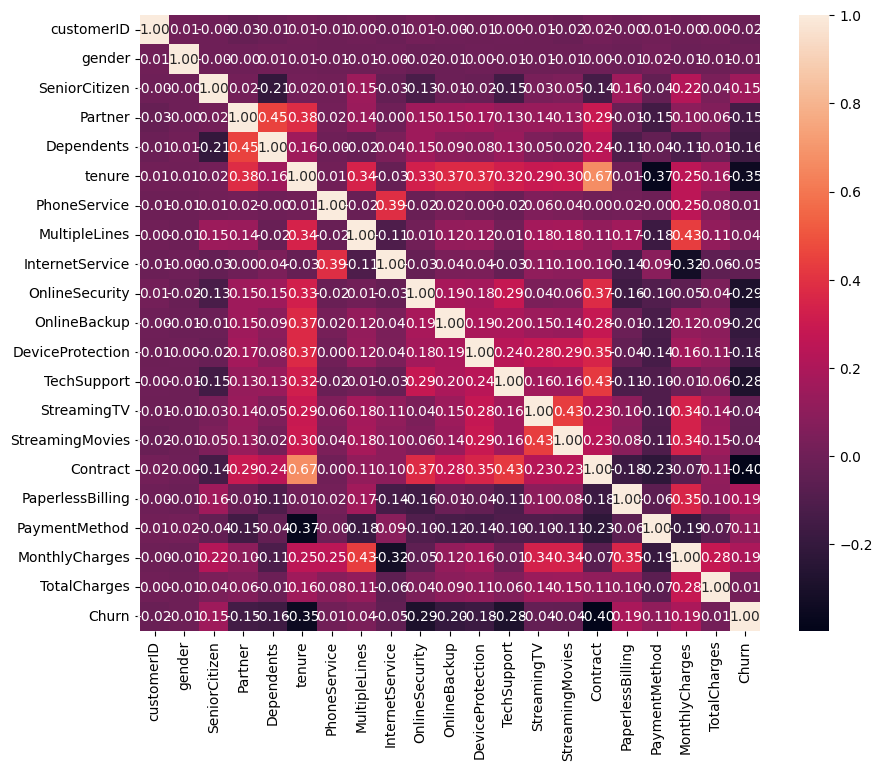

In [6]:
# Exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

# a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(CustomerDt.corr(), annot=True, fmt='.2f')
plt.show()

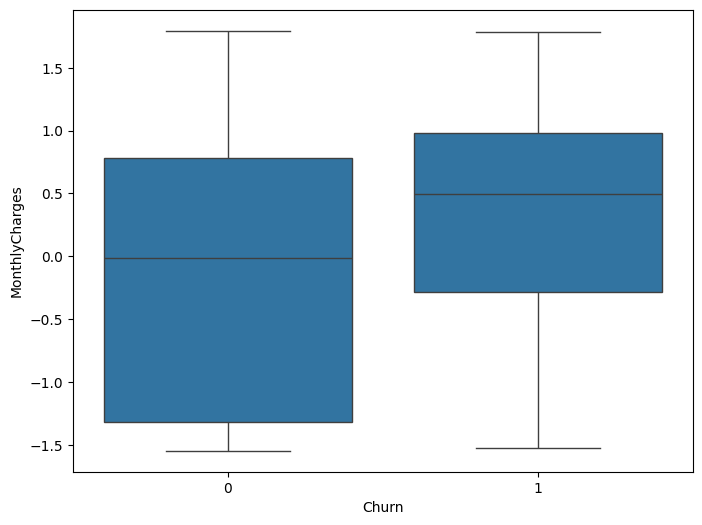

In [7]:
# Boxplot of Monthly Charges vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=CustomerDt)
plt.show()

In [18]:
# Displaying the basic information about the dataset
CustomerDt.info()

# Summary statistics for the numerical columns
CustomerDt.describe()

# Checking distribution of churned vs. non-churned customers
churn_distribution = CustomerDt['Churn'].value_counts(normalize=True) * 100
print(f'Churn distribution:\n{churn_distribution}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


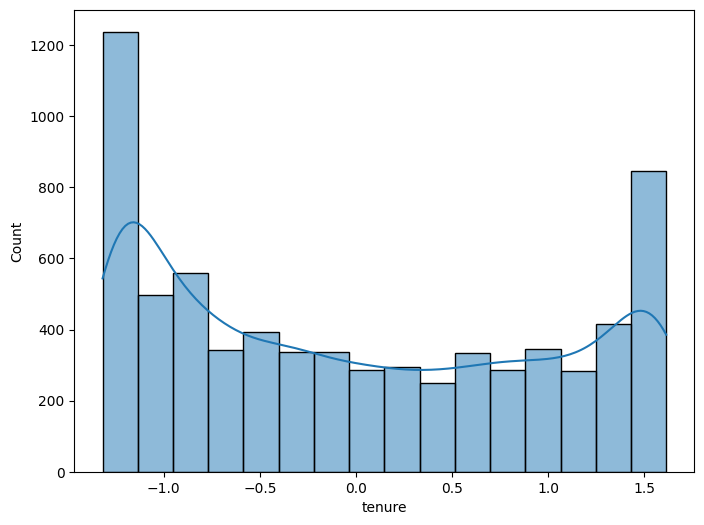

In [8]:
# Histogram of tenure
plt.figure(figsize=(8, 6))
sns.histplot(CustomerDt['tenure'], kde=True)
plt.show()

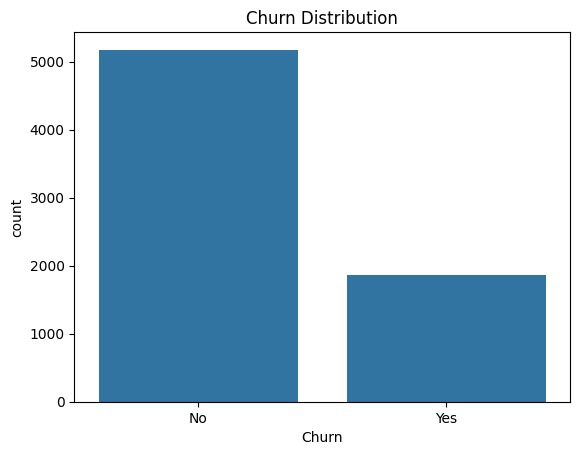

In [20]:
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting churn distribution
sns.countplot(x='Churn', data=CustomerDt)
plt.title('Churn Distribution')
plt.show()

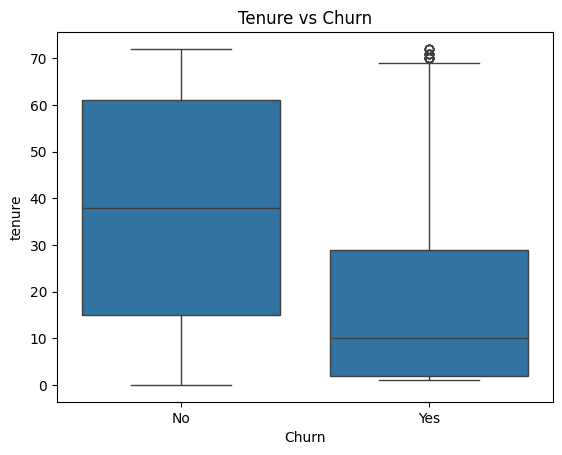

In [21]:
# Plotting distribution of tenure by churn status
sns.boxplot(x='Churn', y='tenure', data=CustomerDt)
plt.title('Tenure vs Churn')
plt.show()

In [22]:
# Feature engineering
# Converting categorical variables to numerical using pd.get_dummies
CustomerDt_encoded = pd.get_dummies(CustomerDt, drop_first=True)

# Checking encoded data
CustomerDt_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,45,42.30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [29]:
#Model development
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Splitting data into features (X) and target (y)
X = CustomerDt_encoded.drop('Churn_Yes', axis=1)
y = CustomerDt_encoded['Churn_Yes']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]
model.fit(X_train, y_train)

# Predicting test data
y_pred = model.predict(X_test)

# Training a logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print(f"Logistic Regression AUC: {roc_auc_score(y_test, log_reg_pred)}")

# Training a gradient boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print(f"Gradient Boosting AUC: {roc_auc_score(y_test, gb_pred)}")

# Print classification report for the best model
print(classification_report(y_test, gb_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression AUC: 0.7414951815085862
Gradient Boosting AUC: 0.7212287929446106
              precision    recall  f1-score   support

       False       0.84      0.92      0.88      1036
        True       0.70      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [10]:
# interpretability
!pip install shap
!conda install -c conda-forge shap

/bin/bash: line 1: conda: command not found


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

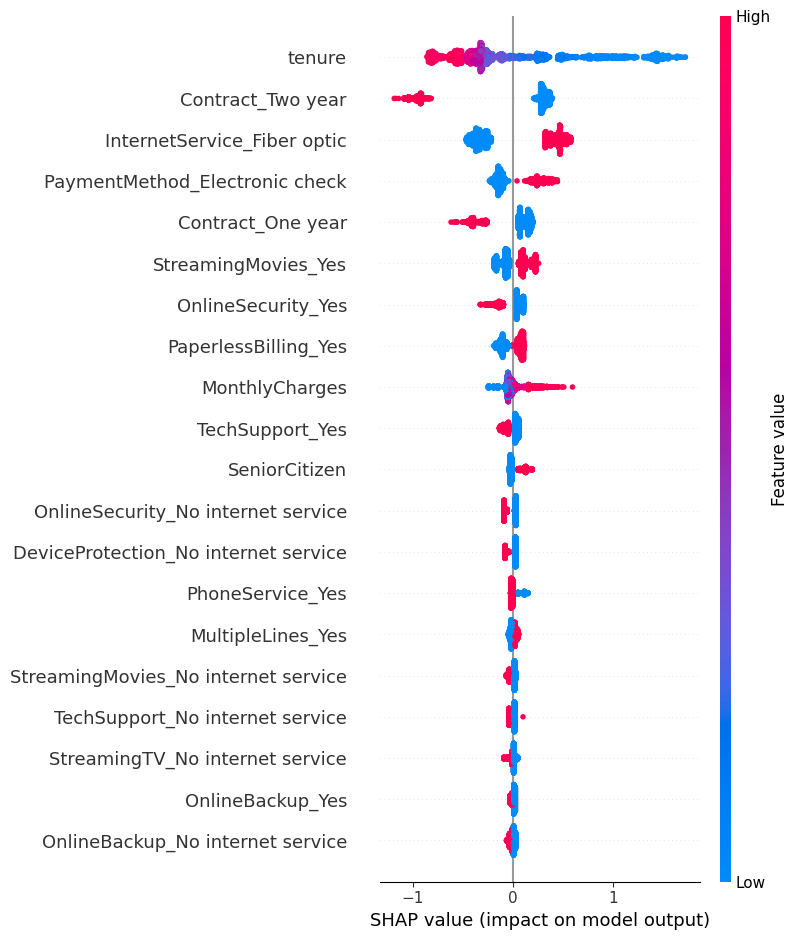

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
import shap
import matplotlib.pyplot as plt

# Load dataset
CustomerData = 'Telco_Customer_Churn.csv'
CustomerDt = pd.read_csv(CustomerData)

# Display first few rows of the dataset
print(CustomerDt.head())

# Preprocess the data
# Assumption is'Churn' is target variable and rest are features
# encoding categorical variables and handle the missing values

CustomerDt = CustomerDt.dropna()  # Drop missing values
# Features
X = CustomerDt.drop(columns=['Churn'])
# Target (binary encoding)
y = CustomerDt['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Converting categorical features to the dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Using SHAP for feature importance
explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(X_test)

# Creating SHAP summary plot
shap.summary_plot(shap_values, X_test)
plt.show()

In [25]:
# for project development
!pip install gunicorn
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    CustomerDt = request.get_json(force=True)
    customerdf = pd.DataFrame(CustomerDt)
    customerdf = scaler.transform(customerdf)
    prediction = gb.predict(customerdf)
    return jsonify({'prediction': int(prediction[0])})
# Changing port to 5001
if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5001)

# currently studying on nginx and web servers, thus not completed on the deployment bit.

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5001
 * Running on http://172.28.0.12:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
